In [2]:
from qiskit import ClassicalRegister,QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import BasicAer
q = QuantumRegister(4)
c = ClassicalRegister(4)
backend = BasicAer.get_backend('qasm_simulator')

In [3]:
training_set = [[0, 1], [0.78861006, 0.61489363]]
labels = [0, 1]
test_set = [[-0.549, 0.836], [0.053 , 0.999]]

In [4]:
test_angles = [4.30417579487669/2,3.0357101997648965/2]
training_angle = 1.3245021469658966/4

In [5]:
def prepare_state(q, c, angles):
    ancilla_qubit = q[0]
    index_qubit = q[1]
    data_qubit = q[2]
    class_qubit = q[3]
    circuit = QuantumCircuit(q, c)
 # Ancilla and index qubits into uniform superposition
    circuit.h(ancilla_qubit)
    circuit.h(index_qubit)
    
# Prepare the test vector
    circuit.cx(ancilla_qubit, data_qubit)
    circuit.u3(-angles[0], 0, 0, data_qubit)
    circuit.cx(ancilla_qubit, data_qubit)
    circuit.u3(angles[0], 0, 0, data_qubit)
    
#Flip the ancilla qubit
    circuit.x(ancilla_qubit)
    circuit.barrier()
    
# Prepare the first training vector and We can prepare this with a Toffoli
    circuit.ccx(ancilla_qubit, index_qubit,data_qubit)
# Flip index qubit -> moves the first training vector to the
# |0> state of the index qubit
    circuit.x(index_qubit)
    circuit.barrier()

# Prepare the second training vector
# [0.78861, 0.61489] -> class 1
    circuit.ccx(ancilla_qubit, index_qubit,data_qubit)
    circuit.cx(index_qubit, data_qubit)
    circuit.u3(angles[1], 0, 0, data_qubit)
    circuit.cx(index_qubit, data_qubit)
    circuit.u3(-angles[1], 0, 0, data_qubit)
    circuit.ccx(ancilla_qubit, index_qubit,data_qubit)
    circuit.cx(index_qubit, data_qubit)
    circuit.u3(-angles[1], 0, 0, data_qubit)
    circuit.cx(index_qubit, data_qubit)
    circuit.u3(angles[1], 0, 0, data_qubit)
    circuit.barrier()
    
# Flip the class label for training vector #2
    circuit.cx(index_qubit, class_qubit)
    circuit.barrier()
    return circuit
   





In [6]:
from qiskit.tools.visualization import circuit_drawer

angles = [test_angles[0], training_angle]
state_preparation_0 = prepare_state(q, c, angles)
circuit_drawer(state_preparation_0)


C:\Users\Admin\AppData\Local\Temp\ipykernel_12080\1166823931.py:13: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  circuit.u3(-angles[0], 0, 0, data_qubit)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12080\1166823931.py:15: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  circuit.u3(angles[0], 0, 0, data_qubit)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12080\1166823931.

┌───┐                                   ┌───┐        ░            ░      »
q0_0: ┤ H ├──■───────────────────────■────────┤ X ├────────░───■────────░───■──»
      ├───┤  │                       │        └───┘        ░   │  ┌───┐ ░   │  »
q0_1: ┤ H ├──┼───────────────────────┼─────────────────────░───■──┤ X ├─░───■──»
      └───┘┌─┴─┐┌─────────────────┐┌─┴─┐┌────────────────┐ ░ ┌─┴─┐└───┘ ░ ┌─┴─┐»
q0_2: ─────┤ X ├┤ U3(-2.1521,0,0) ├┤ X ├┤ U3(2.1521,0,0) ├─░─┤ X ├──────░─┤ X ├»
           └───┘└─────────────────┘└───┘└────────────────┘ ░ └───┘      ░ └───┘»
q0_3: ─────────────────────────────────────────────────────░────────────░──────»
                                                           ░            ░      »
c0: 4/═════════════════════════════════════════════════════════════════════════»
                                                                               »
«                                                                 »
«q0_0: ───────────────────────────────────────────────────■───────»
«                                                         │       »
«q0_1: ──■───────────────────────■────────────────────────■────■──»
«      ┌─┴─┐┌─────────────────┐┌─┴─┐┌──────────────────┐┌─┴─┐┌─┴─┐»
«q0_2: ┤ X ├┤ U3(0.33113,0,0) ├┤ X ├┤ U3(-0.33113,0,0) ├┤ X ├┤ X ├»
«      └───┘└─────────────────┘└───┘└──────────────────┘└───┘└───┘»
«q0_3: ───────────────────────────────────────────────────────────»
«                                                                 »
«c0: 4/═══════════════════════════════════════════════════════════»
«                                                                 »
«                                                   ░       ░ 
«q0_0: ─────────────────────────────────────────────░───────░─
«                                                   ░       ░ 
«q0_1: ──────────────────────■──────────────────────░───■───░─
«      ┌──────────────────┐┌─┴─┐┌─────────────────┐ ░   │   ░ 
«q0_2: ┤ U3(-0.33113,0,0) ├┤ X ├┤ U3(0.33113,0,0) ├─░───┼───░─
«      └──────────────────┘└───┘└─────────────────┘ ░ ┌─┴─┐ ░ 
«q0_3: ─────────────────────────────────────────────░─┤ X ├─░─
«                                                   ░ └───┘ ░ 
«c0: 4/═══════════════════════════════════════════════════════
«

In [7]:
def interfere_data_and_test_instances(circuit, q, c,angles):
    circuit.h(q[0])
    circuit.barrier()
    circuit.measure(q, c)
    return circuit


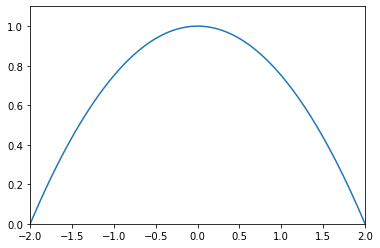

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.linspace(-2, 2, 100)
plt.xlim(-2, 2)
plt.ylim(0, 1.1)
plt.plot(x, 1-x**2/4)
